<a href="https://www.kaggle.com/ranjeetshrivastav/tabular-playground-series-apr-2021?scriptVersionId=88454558" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-apr-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-apr-2021/train.csv
/kaggle/input/tabular-playground-series-apr-2021/test.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Loading data

In [3]:
train = pd.read_csv(r'../input/tabular-playground-series-apr-2021/train.csv')
test = pd.read_csv(r'../input/tabular-playground-series-apr-2021/test.csv')

In [4]:
train.shape, test.shape

((100000, 12), (100000, 11))

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C


## 2. Combining Data

In [7]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test],ignore_index=True)

In [8]:
data.shape

(200000, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  200000 non-null  int64  
 1   Survived     100000 non-null  float64
 2   Pclass       200000 non-null  int64  
 3   Name         200000 non-null  object 
 4   Sex          200000 non-null  object 
 5   Age          193221 non-null  float64
 6   SibSp        200000 non-null  int64  
 7   Parch        200000 non-null  int64  
 8   Ticket       190196 non-null  object 
 9   Fare         199733 non-null  float64
 10  Cabin        61303 non-null   object 
 11  Embarked     199473 non-null  object 
 12  source       200000 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 19.8+ MB


In [10]:
data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
source          object
dtype: object

In [11]:
data.nunique()

PassengerId    200000
Survived            2
Pclass              3
Name           174854
Sex                 2
Age               175
SibSp               7
Parch               8
Ticket         132613
Fare            22649
Cabin           45442
Embarked            3
source              2
dtype: int64

## 3. Data Visualization

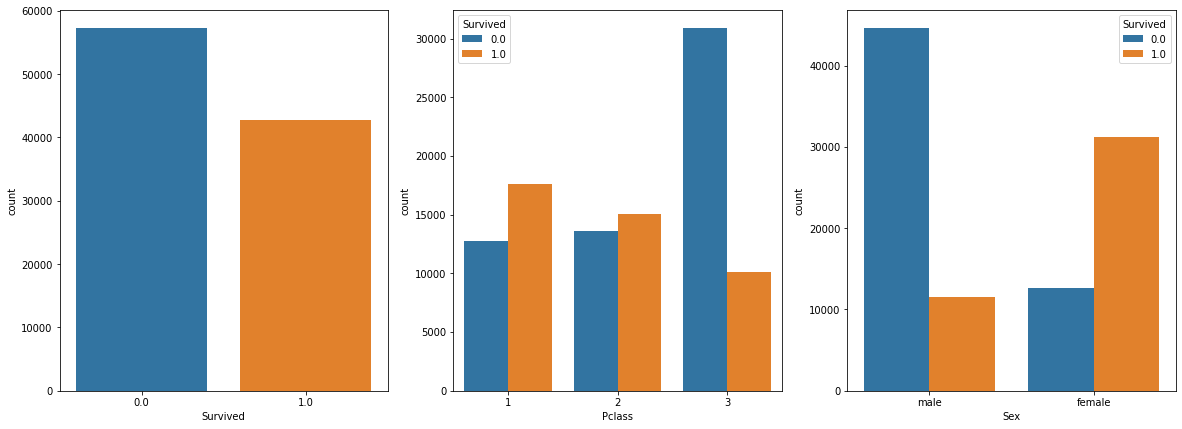

In [12]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(x='Survived',data=data)

plt.subplot(132)
sns.countplot(x='Pclass',hue='Survived',data=data)

plt.subplot(133)
sns.countplot(x='Sex',hue='Survived',data=data)
plt.show()

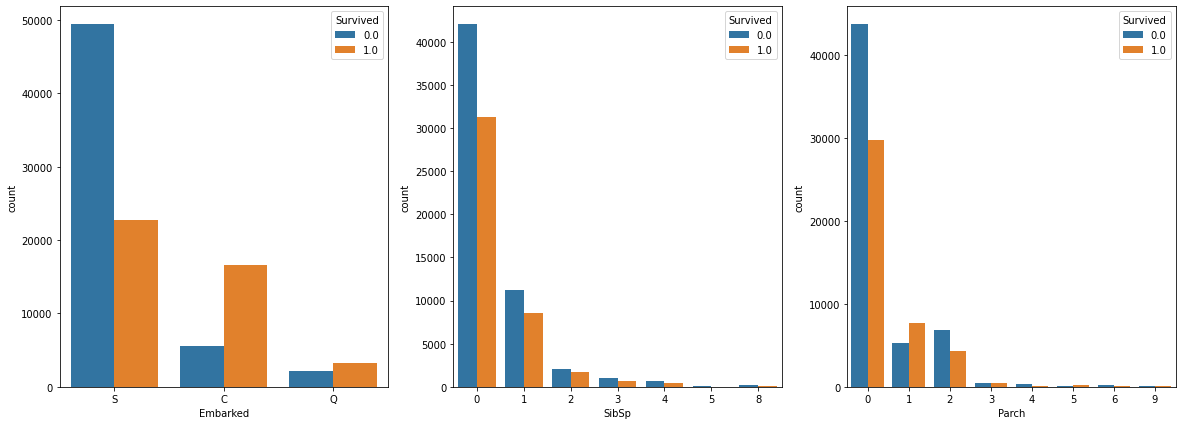

In [13]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(x='Embarked',hue='Survived',data=data)

plt.subplot(132)
sns.countplot(x='SibSp',hue='Survived',data=data)

plt.subplot(133)
sns.countplot(x='Parch',hue='Survived',data=data)
plt.show()

## 4. Missing values

In [14]:
data.isnull().sum()

PassengerId         0
Survived       100000
Pclass              0
Name                0
Sex                 0
Age              6779
SibSp               0
Parch               0
Ticket           9804
Fare              267
Cabin          138697
Embarked          527
source              0
dtype: int64

In [15]:
data.drop(['Name','Ticket'],axis=1,inplace=True)

In [16]:
data.isnull().sum()

PassengerId         0
Survived       100000
Pclass              0
Sex                 0
Age              6779
SibSp               0
Parch               0
Fare              267
Cabin          138697
Embarked          527
source              0
dtype: int64

In [17]:
data['Age'].describe()

count    193221.000000
mean         34.464565
std          16.783847
min           0.080000
25%          22.000000
50%          31.000000
75%          48.000000
max          87.000000
Name: Age, dtype: float64

In [18]:
data['Age'].mode()

0    23.0
dtype: float64

In [19]:
data['Age'].replace(np.nan,23.0,inplace=True)

In [20]:
data.loc[data.Age < 1, "Age"] = data.Age * 100
data['Age'].astype(int)

0         23
1         23
2         33
3         19
4         25
          ..
199995    27
199996    59
199997    47
199998    49
199999    41
Name: Age, Length: 200000, dtype: int64

In [21]:
data['Embarked'].mode()

0    S
dtype: object

In [22]:
data['Embarked'].replace(np.nan,'S',inplace=True)

In [23]:
data['Fare'].fillna(data['Fare'].mean(),inplace=True)

In [24]:
data['Fare'] = data['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [25]:
data['Cabin'].mode()

0    C10839
1    C11139
2    C12388
3    C19828
dtype: object

In [26]:
data['Cabin'].replace(np.nan,'C11139',inplace=True)

In [27]:
data.isna().sum()

PassengerId         0
Survived       100000
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                0
Cabin               0
Embarked            0
source              0
dtype: int64

In [28]:
#Get the first one character of cabin:
data['Cabin'] = data['Cabin'].apply(lambda x: x[0:1])
data['Cabin'].value_counts()

C    157515
B     15552
A     13519
D      6158
E      3586
F      2986
G       626
T        58
Name: Cabin, dtype: int64

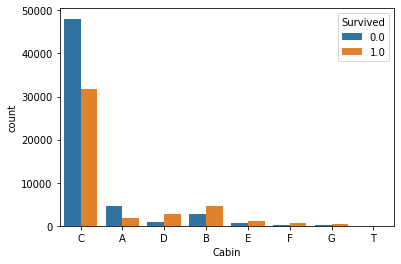

In [29]:
sns.countplot(x='Cabin',hue='Survived',data=data)
plt.show()

In [30]:
data['family_size'] = data['SibSp']+data['Parch']+1

In [31]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,source,family_size
0,0,1.0,1,male,23.0,2,0,3.301009,C,S,train,3
1,1,0.0,3,male,23.0,0,0,2.591516,C,S,train,1
2,2,0.0,3,male,33.0,1,2,4.266756,C,S,train,4
3,3,0.0,3,male,19.0,0,0,2.568022,C,S,train,1
4,4,1.0,3,male,25.0,0,0,2.048982,C,S,train,1


In [32]:
train_modified = data.loc[data['source']=='train']
test_modified = data.loc[data['source']=='test']

test_modified.drop(['source','Survived',],axis=1,inplace=True)
train_modified.drop('source',axis=1,inplace=True)

## 5. Data Preprocessing

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_modified['Cabin'] = le.fit_transform(train_modified['Cabin'])
test_modified['Cabin'] = le.fit_transform(test_modified['Cabin'])

In [34]:
#onehot encoding
train_modified = pd.get_dummies(train_modified, columns = ['Sex','Embarked'])
test_modified = pd.get_dummies(test_modified, columns = ['Sex','Embarked'])

In [35]:
X = train_modified.drop('Survived',axis=1)
y=train_modified['Survived']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=train_modified['Survived'],test_size=0.40)

## 6. feature selection

#### 6.1 Using Mutual Information(MI)

In [37]:
#from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
#mutual_info = mutual_info_classif(X_train, y_train)
#mutual_info

In [38]:

#mutual_info = pd.Series(mutual_info)
#mutual_info.index = X_train.columns
#mutual_info.sort_values(ascending=False)

In [39]:
#let's plot the ordered mutual_info values per feature
#mutual_info.sort_values(ascending=False).plot.bar(figsize=(14, 7))

In [40]:
#from sklearn.feature_selection import SelectKBest
#we Will select the  top 6 important features
#sel_five_cols = SelectKBest(mutual_info_classif, k=6)
#sel_five_cols.fit(X_train, y_train)
#X_train.columns[sel_five_cols.get_support()]

#### 6.2 Using Pearson Correlation

In [41]:
X_train.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,family_size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.001894,-0.003220,0.002581,0.003829,0.003304,0.004283,0.004145,-0.002499,0.002499,0.004842,-0.005298,-0.001801
Pclass,-0.001894,1.000000,-0.241962,-0.049863,-0.041291,-0.558965,0.215981,-0.058135,-0.201107,0.201107,-0.291101,-0.185862,0.364937
Age,-0.003220,-0.241962,1.000000,-0.093014,-0.104206,0.118526,-0.034114,-0.126699,0.080383,-0.080383,0.095784,0.149329,-0.164949
SibSp,0.002581,-0.049863,-0.093014,1.000000,0.216319,0.167162,-0.108415,0.755016,0.030679,-0.030679,-0.020122,-0.031017,0.034472
Parch,0.003829,-0.041291,-0.104206,0.216319,1.000000,0.185186,-0.107633,0.803506,0.087192,-0.087192,0.015834,-0.006493,-0.011401
Fare,0.003304,-0.558965,0.118526,0.167162,0.185186,1.000000,-0.178763,0.226297,0.222870,-0.222870,0.271831,0.139964,-0.323684
Cabin,0.004283,0.215981,-0.034114,-0.108415,-0.107633,-0.178763,1.000000,-0.138391,0.082277,-0.082277,0.057365,-0.075559,-0.014827
family_size,0.004145,-0.058135,-0.126699,0.755016,0.803506,0.226297,-0.138391,1.000000,0.077265,-0.077265,-0.001635,-0.023273,0.013362
Sex_female,-0.002499,-0.201107,0.080383,0.030679,0.087192,0.222870,0.082277,0.077265,1.000000,-1.000000,0.292427,0.127608,-0.336524
Sex_male,0.002499,0.201107,-0.080383,-0.030679,-0.087192,-0.222870,-0.082277,-0.077265,-1.000000,1.000000,-0.292427,-0.127608,0.336524


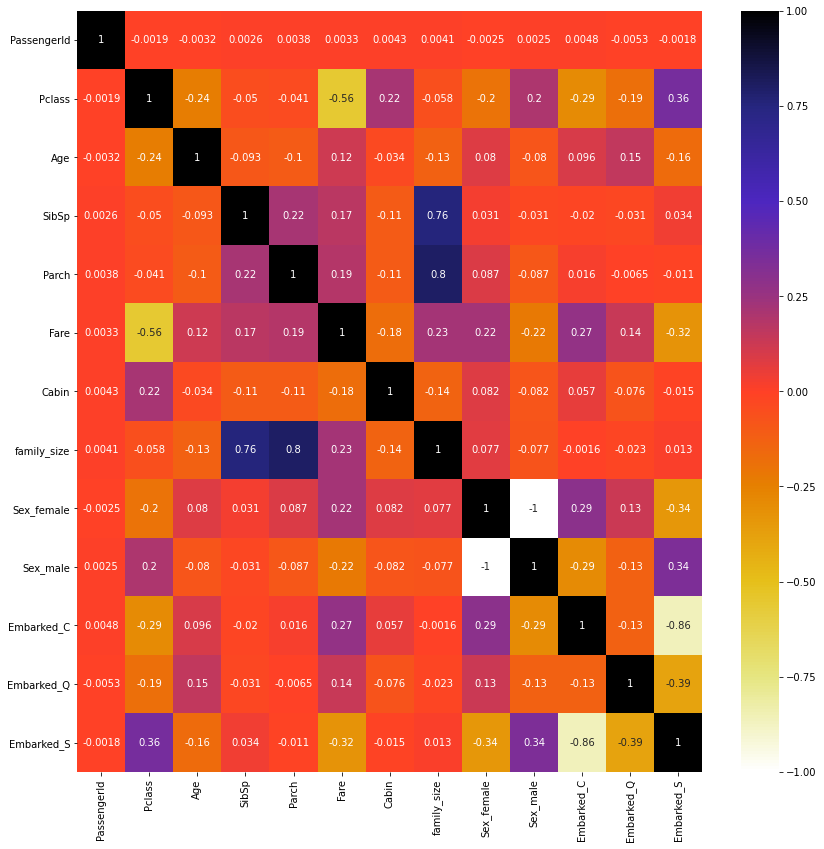

In [42]:
plt.figure(figsize=(14,14))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [43]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [44]:
corr_features = correlation(X_train,0.6)
len(set(corr_features))

1

In [45]:
corr_features

{'family_size'}

In [46]:
X_train.drop('PassengerId',axis=1)
X_test.drop('PassengerId',axis=1)
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)
#X_train.drop(['Parch','SibSp'],axis=1)
#X_test.drop(['Parch','SibSp'],axis=1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
62656,62656,1,61.0,0,0,5.251959,1,1,0,0,1,0
78747,78747,1,37.0,0,1,5.334263,3,1,0,1,0,0
61081,61081,3,26.0,0,0,2.020222,4,0,1,1,0,0
24170,24170,3,19.0,0,0,1.941615,2,1,0,0,0,1
36235,36235,1,55.0,0,0,6.554717,2,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
68983,68983,2,35.0,0,0,2.310553,2,0,1,0,0,1
42413,42413,3,22.0,0,0,2.258633,2,1,0,0,0,1
92521,92521,3,68.0,1,1,3.654288,1,1,0,0,0,1
89975,89975,3,56.0,0,0,3.397858,2,1,0,0,0,1


## 7. Model Building and Evaluation

#### 7.1 XGBOOST

In [47]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=6,
                    n_estimators=441, 
                    n_jobs=-1,
                    learning_rate=0.01,
                    nround = 9, #Number of Boosting rounds
                    early_stopping_rounds = 3, 
                    objective = "binary:logistic", 
                    gamma = 1)
xgb.fit(X_train,y_train)

[08:35:28] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds, nround } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:35:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=3,
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=441, n_jobs=-1, nround=9,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [48]:
pred = xgb.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7789

In [50]:
test_pred = xgb.predict(test_modified)
test['Survived'] = test_pred.astype(int)
submission_1 =test[['PassengerId','Survived']]
#submission_1['Survived'] = np.where(test_pred>0.5, 1, 0)
submission_1.to_csv('xgb.csv',index=False)

#### 7.2 LIGHTGBM

In [51]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(max_depth=8,
                     n_estimators=541,
                     n_jobs=1,
                     num_leaves=8,
                    learning_rate=0.01)
lgb.fit(X_train,y_train)
pred = lgb.predict(X_test)

In [52]:
accuracy_score(y_test,pred)

0.7774

In [53]:
test_pred = lgb.predict(test_modified)
test['Survived'] = test_pred.astype(int)
submission_1 =test[['PassengerId','Survived']]
#submission_1['Survived'] = np.where(test_pred>0.5, 1, 0)
submission_1.to_csv('lgb.csv',index=False)

#### 7.3 CATBOOST

In [54]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(n_estimators=350,
                             learning_rate=0.01,
                             max_depth=6)
cat.fit(X_train,y_train)

0:	learn: 0.6884404	total: 75.2ms	remaining: 26.2s
1:	learn: 0.6839391	total: 96.9ms	remaining: 16.9s
2:	learn: 0.6795338	total: 118ms	remaining: 13.6s
3:	learn: 0.6753925	total: 139ms	remaining: 12s
4:	learn: 0.6712864	total: 159ms	remaining: 11s
5:	learn: 0.6670420	total: 181ms	remaining: 10.4s
6:	learn: 0.6630214	total: 202ms	remaining: 9.88s
7:	learn: 0.6591539	total: 222ms	remaining: 9.49s
8:	learn: 0.6553572	total: 243ms	remaining: 9.21s
9:	learn: 0.6516513	total: 262ms	remaining: 8.91s
10:	learn: 0.6479147	total: 286ms	remaining: 8.82s
11:	learn: 0.6443345	total: 307ms	remaining: 8.64s
12:	learn: 0.6407434	total: 327ms	remaining: 8.48s
13:	learn: 0.6373682	total: 347ms	remaining: 8.34s
14:	learn: 0.6339592	total: 368ms	remaining: 8.21s
15:	learn: 0.6305648	total: 390ms	remaining: 8.14s
16:	learn: 0.6273987	total: 412ms	remaining: 8.06s
17:	learn: 0.6242620	total: 433ms	remaining: 7.99s
18:	learn: 0.6212649	total: 455ms	remaining: 7.92s
19:	learn: 0.6181850	total: 476ms	remaining

In [55]:
pred = cat.predict(X_test)
accuracy_score(y_test,pred)

0.77815

In [56]:
test_pred = cat.predict(test_modified)
test['Survived'] = test_pred
submission_1 =test[['PassengerId','Survived']]
submission_1['Survived'] = np.where(test_pred>0.5, 1, 0)
submission_1.to_csv('cat.csv',index=False)

#### 7.4 RANDOM FOREST

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,
                            max_leaf_nodes = 30)
rf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000)

In [58]:
pred = rf.predict(X_test)
accuracy_score(y_test,pred)

0.7759

In [59]:
test_pred = rf.predict(test_modified)
test['Survived'] = test_pred.astype(int)
submission_1 =test[['PassengerId','Survived']]
#submission_1['Survived'] = np.where(test_pred>0.5, 1, 0)
submission_1.to_csv('random_forest.csv',index=False)

#### 7.5 EXTRA TREE CLASSIFIER

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier(n_estimators=900, 
                               max_depth=14, 
                               min_samples_leaf=40, 
                               n_jobs=1)
tree.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=14, min_samples_leaf=40, n_estimators=900,
                     n_jobs=1)

In [61]:
pred = tree.predict(X_test)
accuracy_score(y_test,pred)

0.771975

In [62]:
test_pred = tree.predict(test_modified)
test['Survived'] = test_pred.astype(int)
submission_1 =test[['PassengerId','Survived']]
#submission_1['Survived'] = np.where(test_pred>0.5, 1, 0)
submission_1.to_csv('extra_tree.csv',index=False)